## Model Creation


In [1]:
# cell magic functions :
#   `%%capture` blocks jupyter notebook output,
#   `%%script false --no-raise-error` avoid cell execution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta #Date arithmetic
import mplfinance as mpf

#import PIL
#print('Pillow Version:', PIL.__version__)

# load and show an image with Pillow
from PIL import Image

import h5py
import os
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import time

# Below 4 lines needed to reload function definitions
import sys, importlib
from project_functions import *
importlib.reload(sys.modules['project_functions'])
from project_functions import *




2.2.0
Num GPUs Available:  1


In [2]:
from tensorflow.keras.mixed_precision import experimental as mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

%load_ext tensorboard
import datetime
# Clear any logs from previous runs
!rm -rf ../data/logs/ 

log_dir = "../data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [3]:
# Read Image Data
set_x,set_y = readXYfromDisk()

print(set_x.shape)
print(set_y.shape)

print(calcArrayMemorySize(set_x))

values, counts = np.unique(set_y, axis=0, return_counts=True)
# into a dict for presentation
#{tuple(a):b for a,b in zip(values, counts)}

print(values)
print(counts)



(58842, 192, 192, 3)
(58842,)
Memory size is : 6205.9921875 Mb
[0 1 2]
[30464 13766 14612]


In [4]:
%%script false --no-raise-error

# Test Single file 
#file = h5py.File("data/Set0_128x128_Window20.h5", "r")
#file = h5py.File("data/Archive_256x256_Window20/SetA2M.AX.h5", "r")
#file = h5py.File("../data/Set0.h5", "r")
#file = h5py.File("../data/Archive_uint8/SetAGL.AX.h5", "r")
file = h5py.File("../data/test/SetAMP.AX.h5", "r")
set_x = file["set_x"][:]
set_y = file["set_y"][:]
file.close()



In [5]:
%%script false --no-raise-error

#Normalise X
#set_x = set_x/255.

set_x /= 255.

#One hot encode Y
#set_y = tf.keras.utils.to_categorical(set_y)

print(set_x.shape)
print(set_y.shape)


In [6]:
#,kernel_regularizer=keras.regularizers.l2(0.001)),

model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(288, 432,3)),
    #keras.layers.Flatten(batch_input_shape=(512,64,64,3)),
    keras.layers.Flatten(input_shape=(192,192,3))
    ,keras.layers.BatchNormalization()

    ,keras.layers.Dense(2048, activation='relu',kernel_initializer=tf.keras.initializers.he_normal())
    ,keras.layers.Dropout(0.5) #rate = keep_probability, lower for higher overfit
    #,keras.layers.BatchNormalization()

    ,keras.layers.Dense(1024, activation='relu',kernel_initializer=tf.keras.initializers.he_normal())
    ,keras.layers.Dropout(0.5) #rate = keep_probability, lower for higher overfit
    #,keras.layers.BatchNormalization()

    ,keras.layers.Dense(512, activation='relu',kernel_initializer=tf.keras.initializers.he_normal())
    ,keras.layers.Dropout(0.5) #rate = keep_probability, lower for higher overfit
    #,keras.layers.BatchNormalization()

    ,keras.layers.Dense(3,activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 110592)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110592)            442368    
_________________________________________________________________
dense (Dense)                (None, 2048)              226494464 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss=tf.keras.losses.CategoricalCrossentropy(),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#model.fit(train_set_x, train_set_y, epochs=10)
history = model.fit(set_x, set_y, batch_size = 16,epochs=10,verbose=1,validation_split=0.2
                    ,callbacks=[tensorboard_callback])


Epoch 1/10
2943/2943 [==============================] - 238s 81ms/step - loss: 2.0056 - accuracy: 0.3924 - val_loss: 1.1969 - val_accuracy: 0.4869
Epoch 2/10
2943/2943 [==============================] - 237s 81ms/step - loss: 1.7992 - accuracy: 0.4044 - val_loss: 1.1479 - val_accuracy: 0.4881
Epoch 3/10
2943/2943 [==============================] - 237s 81ms/step - loss: 1.6418 - accuracy: 0.4149 - val_loss: 1.1112 - val_accuracy: 0.4846
Epoch 4/10
2943/2943 [==============================] - 238s 81ms/step - loss: 1.5624 - accuracy: 0.4140 - val_loss: 1.0853 - val_accuracy: 0.4851
Epoch 5/10
2943/2943 [==============================] - 237s 81ms/step - loss: 1.4933 - accuracy: 0.4186 - val_loss: 1.0748 - val_accuracy: 0.4864
Epoch 6/10
2943/2943 [==============================] - 238s 81ms/step - loss: 1.4286 - accuracy: 0.4217 - val_loss: 1.0660 - val_accuracy: 0.4882
Epoch 7/10
2943/2943 [==============================] - 236s 80ms/step - loss: 1.3812 - accuracy: 0.4253 - val_loss: 1

In [ ]:
Epoch 1/100
213/213 [==============================] - 11s 51ms/step - loss: 1.3432 - accuracy: 0.4025 - val_loss: 24.8063 - val_accuracy: 0.5994
Epoch 2/100
213/213 [==============================] - 11s 50ms/step - loss: 1.1990 - accuracy: 0.4473 - val_loss: 9.5674 - val_accuracy: 0.5994
Epoch 3/100
213/213 [==============================] - 11s 50ms/step - loss: 1.1347 - accuracy: 0.4728 - val_loss: 2.8377 - val_accuracy: 0.5993
Epoch 4/100
213/213 [==============================] - 11s 51ms/step - loss: 1.0757 - accuracy: 0.4974 - val_loss: 1.1087 - val_accuracy: 0.5628
Epoch 5/100
213/213 [==============================] - 11s 51ms/step - loss: 1.0395 - accuracy: 0.5120 - val_loss: 1.0125 - val_accuracy: 0.5593


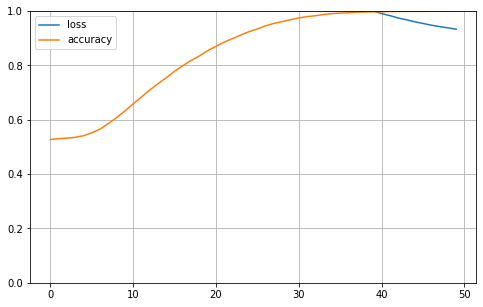

In [8]:
 
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [ 0 - 1 ]
plt.show()


In [9]:
file = h5py.File("../data/test/SetANN.AX.h5", "r")
test_set_x = file["set_x"][:]
test_set_y = file["set_y"][:]
file.close()


test_loss, test_acc = model.evaluate(test_set_x,  test_set_y, verbose=1)


118/118 [==============================] - 1s 9ms/step - loss: 3.2814 - accuracy: 0.4417


### Train test split

In [ ]:
# Alternate train test split

m = set_x.shape[0]                  # number of training examples

#train_pct_index = int(0.8 * len(X))
train_pct_index = np.random.randint(m, size= (m * 80)//100)

#train_set_x, test_set_x = set_x[train_pct_index,:,:,:], set_x[~train_pct_index:,:,:,:]
#train_set_y, test_set_y = set_y[:train_pct_index], set_y[~train_pct_index:]

len(train_pct_index)


### Another method

m = set_x.shape[0]                  # number of training examples

#Shuffle X and Y ?
#permutation = list(np.random.permutation(m))
#set_x = set_x[permutation,:,:,:]
#set_y = set_y[permutation,:]
    
print(m)

#Split train/test
training_idx = np.random.randint(m, size= (m * 75)//100)
test_idx = np.random.randint(m, size= (m * 25)//100)
print(training_idx)
print(test_idx)

train_set_x, test_set_x = set_x[training_idx,:,:,:], set_x[test_idx,:,:,:]
train_set_y, test_set_y = set_y[training_idx], set_y[test_idx]


print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)



In [ ]:
#https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

X = []
y = []

for features,label in image_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

print(X[0])
print(y[0])



In [ ]:
#https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
#https://realpython.com/storing-images-in-python/

import PIL
print('Pillow Version:', PIL.__version__)

# load and show an image with Pillow
from PIL import Image


In [ ]:
# Open the image form working directory
image = Image.open('data/images/fig5.png')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
#load_image.show()



In [ ]:
from numpy import asarray

# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

#image_without_alpha = image[:,:,:3]
#print(data[:,:,:3])

In [ ]:
#Image resize
load_img_rz = np.array(Image.open('data/images/fig5.png').resize((200,200)))
Image.fromarray(load_img_rz).save('data/images/r_kolala.png')
print("After resizing:",load_img_rz.shape)


In [ ]:
#Crop
im = np.array(Image.open('data/images/fig5.png'))

print("Before trimming:",im.shape)

im_trim = im[100:250,10:260]
print("After trimming:",im_trim.shape)

Image.fromarray(im_trim).save('data/images/trim_kolala.png')

#print(im_trim)

In [ ]:
#https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
def crop_center(img,cropx,cropy):
    y,x,_ = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]


im = np.array(Image.open('data/images/fig5.png'))

print("Before trimming:",im.shape)



im_trim = crop_center(im,4,6)
print("After trimming:",im_trim.shape)

Image.fromarray(im_trim).save('data/images/trim_kolala.png')




### Old Code

In [ ]:
#Split train/test
training_idx = np.random.randint(m, size= (m * 75)//100)
test_idx = np.random.randint(m, size= (m * 25)//100)
print(training_idx)
print(test_idx)

train_set_x, test_set_x = set_x[training_idx,:,:,:], set_x[test_idx,:,:,:]
train_set_y, test_set_y = set_y[training_idx], set_y[test_idx]



In [ ]:
# Store inside HDF5 file
file = h5py.File("data/myData.h5", "w")
file.create_dataset('set_x', data=set_x)
file.create_dataset('set_y', data=set_y)
file.close()

# Read from the file
file = h5py.File("data/myData.h5", "r")
set_x = file["set_x"][:]
set_y = file["set_y"][:]
file.close()



In [ ]:
# Earlier attempt
# When result was a list of set_x and set_y
# Uses list comprehension
first = [x for (x,y) in result]
set_y = np.concatenate(first,axis =0)

second = [y for (x,y) in result]
set_x = np.concatenate(second,axis =0)



In [ ]:
# Earlier attempt when result was a list of set_x and set_y
# The entire result list was converted to array
# But the conversion was very slow (and got stuck)
result_array = np.array(result)

set_y = result_array[:,0,:]
set_y = set_y.reshape(150,).astype('int')
print(set_y.shape)

set_x_temp = result_array[:,1,:]
print(set_x_temp.shape)
#set_x_temp[1,1].shape
set_x = []
for i in range(set_x_temp.shape[0]):
    for j in range(set_x_temp.shape[1]):
        set_x.append(set_x_temp[i,j])
    
set_x = np.array(set_x)

set_x.shape




In [ ]:

# DID NOT WORK
#Try multithreading instead of multiprocessing

#Gave this error :
--> 393             self.figure.draw(self.renderer)
    394             # A GUI class may be need to update a window using this draw, so
    395             # don't forget to call the superclass.
    

start_time = time.time()
#import threading as mp
#import multiprocessing as mp
#from multiprocessing.pool import ThreadPool 
from multiprocessing.dummy import Pool as ThreadPool


def applyParallel(dfGrouped, func):
    pool = ThreadPool(20)
    ret_list = pool.map(func, [group for name, group in dfGrouped])
    pool.Close()
    pool.join()
    return ret_list
    
data = df[df['Symbol'].isin(['A2M.AX','AGL.AX','ALL.AX'])]
data_grouped = data.groupby('Symbol')
result = applyParallel(data_grouped, inner_loop)
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:

# First attempt to created the set_x array
# Loops through each Symbol at a time

start_time = time.time()
#data = df
data = df[df['Symbol'].isin(['A2M.AX','AGL.AX'])]

set_x = [] #np.empty(shape=(NO_OF_IMAGES,IMG_SIZE,IMG_SIZE,4))
set_y = []
data_grouped = data.groupby('Symbol')

flag_alternate = 0

for name,group in data_grouped:    
    print(name + '  ' + str(group['Symbol'].count()))

    loop_range=  (group['Symbol'].count()) -  (DATE_WINDOW) - 10
    print(loop_range)
    # No of images each group can have will be Row Count minus Window
    #for i in range(loop_range):
    for i in range(5):    
        #print("Iter:" + str(i))    
        #Save the Target value of the last row as this will be the predicted value
        #target_arr.append(data[-1:]['Target'].item())
        set_y.append(group[-1:]['Target'].item())
        
        #Remove the last row and plot
        group = group[:-1]
        
        
        #Read the saved image and convert it into numpy after resizing
        if flag_alternate == 0:
            save_candlestick(group[-DATE_WINDOW:],name)
            img_asNumpy = np.array(Image.open('data/temp_image0.png',mode='r').resize((IMG_SIZE,IMG_SIZE)))
            flag_alternate = 1
        else:
            save_candlestick(group[-DATE_WINDOW:],1)
            img_asNumpy = np.array(Image.open('data/temp_image1.png',mode='r').resize((IMG_SIZE,IMG_SIZE)))
            flag_alternate = 0
        
        #image_without_alpha 
        img_asNumpy = img_asNumpy[:,:,:3]
        set_x.append(img_asNumpy)    
    

print("--- %s seconds ---" % (time.time() - start_time))



In [ ]:

# Instead of saving the image, just store directly into array
    # In order to get the figure contents as RGB pixel values, the matplotlib.backend_bases.Renderer needs to first draw the contents of the canvas. You can do this by manually calling canvas.draw():
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
    from matplotlib.figure import Figure
    fig = Figure()
    canvas = FigureCanvas(fig)
    canvas.draw()       # draw the canvas, cache the renderer
    image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    set_x.append(image)


In [ ]:
#If the Date column was not indexed
min_date = df['Date'][df['Date'].index.min()]
max_date = df['Date'][df['Date'].index.max()]
df[df['Date'] > (max_date-timedelta(days=DATE_WINDOW))]
df.loc[(max_date-timedelta(days=DATE_WINDOW)):]
df.query('date == "2020-01-01"')

#Since there is date time index
min_date = df.index.min()
max_date = df.index.max()
data = df[max_date-timedelta(days=DATE_WINDOW):max_date]


In [ ]:

#DO NOT RUN
# Reshape X and Y
set_x = set_x.reshape(set_x.shape[0],-1).T
set_y = set_y.reshape(set_y.shape[0],-1).T

print(set_x.shape)
print(set_y.shape)


#Shuffle X
m = set_x.shape[1]                  # number of training examples
permutation = list(np.random.permutation(m))
set_x = set_x[:, permutation]
    
print(m)
#Split train/test
training_idx = np.random.randint(m, size= (m * 80)//100)
test_idx = np.random.randint(m, size= (m * 20)//100)
print(training_idx)
print(test_idx)

train_set_x, test_set_x = set_x[:,training_idx], set_x[:,test_idx]
train_set_y, test_set_y = set_y[:,training_idx], set_y[:,test_idx]

print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)


In [ ]:
#%%capture 
## cell magic function `%%capture` blocks jupyter notebook output,
## which is not needed here since the plot is saved to a file anyway:

#plot_candlestick(df[max_date-timedelta(days=DATE_WINDOW):max_date])

mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc
                        ,rc = {'xtick.major.bottom':False, 'ytick.major.left':False
                               ,'xtick.major.size':0,'ytick.major.size':0
                               ,'axes.labelsize' : 0
                               ,'savefig.jpeg_quality' : 5
                               ,'savefig.bbox':'tight'
                               ,'patch.linewidth' : 0 #candle border
                               ,'lines.linewidth' : 1.5 #wick width
                               ,'axes.spines.left' :False #plot border
                               ,'axes.spines.top' :False
                               ,'axes.spines.bottom' :False
                               ,'axes.spines.right' :False
                               
                              }
                       )

# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',volume=False,figratio=(5,5),figscale=1
              ,savefig='data/images/fig'+ str(1) +'.png')
mpf.plot(df[max_date-timedelta(days=DATE_WINDOW):max_date],**kwargs,style = s)
    
fig.canvas.draw()



In [ ]:
#convert plot to numpy array

mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc
                        ,rc = {'xtick.major.bottom':False, 'ytick.major.left':False
                               ,'xtick.major.size':0,'ytick.major.size':0
                               ,'axes.labelsize' : 0
                               ,'savefig.jpeg_quality' : 5
                               ,'savefig.bbox':'tight'
                               ,'patch.linewidth' : 0 #candle border
                               ,'lines.linewidth' : 1.5 #wick width
                               ,'axes.spines.left' :False #plot border
                               ,'axes.spines.top' :False
                               ,'axes.spines.bottom' :False
                               ,'axes.spines.right' :False
                               
                              }
                       )

# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',volume=False,figratio=(5,5),figscale=1)

mpf.plot(df[max_date-timedelta(days=DATE_WINDOW):max_date],**kwargs,style = s)

#In order to get the figure contents as RGB pixel values, the matplotlib.backend_bases.Renderer needs to first draw the contents of the canvas. You can do this by manually calling canvas.draw():
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)


canvas.draw()       # draw the canvas, cache the renderer

image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')


#data = np.fromstring(fig.tostring_rgb(), dtype=np.uint8, sep='')

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
#fig.canvas.draw()

# Now we can save it to a numpy array.
#data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

image

In [ ]:
#In order to get the figure contents as RGB pixel values, the matplotlib.backend_bases.Renderer needs to first draw the contents of the canvas. You can do this by manually calling canvas.draw():
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.text(0.0,0.0,"Test", fontsize=45)
ax.axis('off')

canvas.draw()       # draw the canvas, cache the renderer

image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
data = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))



In [ ]:
image
data.shape

In [ ]:
# Filtering the dataset using the date index
# but if there are missing dates then the no of records retrieved are not uniform
target = np.zeros(NO_OF_IMAGES)
max_date = df.index.max()

for i in range(NO_OF_IMAGES):
    #breakpoint()
    print("Iter:" + str(i))
    data=df[(max_date-timedelta(days=DATE_WINDOW)):max_date]
    print(data)
    
    #save_candlestick(data,i)
    
    #print(str(data.index.min()) + ' - ' + str(data.index.max()))
    print(max_date)
    varClose = data.iloc[-1]['Close']
    varPrevClose= data.Close.shift(1).iloc[-1]
    
    print(varClose)
    print(varPrevClose)
    print(100 * ((varClose - varPrevClose)/varPrevClose))
    target[i] = fn_setTarget(100 * ((varClose / varPrevClose) - 1))
    print(target[i])
    max_date = data.index.max()-timedelta(days=1)
    print(max_date)
    


    

In [ ]:
#Create new column using the apply function

def fn_setTarget(val):
    if val > UP_THRESHOLD_PCT:
        out = 1
    elif val < -DOWN_THRESHOLD_PCT:
        out = -1
    else:
        out = 0
    return out

data
data['Close_lag'] = 100* (data['Close'] - data['Close'].shift(1))/data['Close'].shift(1)
data['Target'] = data.Close_lag.apply(fn_setTarget)




In [ ]:
%%script false 

# Plotly Saving to image is a pain
import plotly.graph_objects as go
import pandas as pd
import plotly

fig = go.Figure(data=[go.Candlestick(x=df['date']
                                     ,open=df['open']
                                     ,high=df['high']
                                     ,low=df['low']
                                     ,close=df['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()
#Error while saving
#fig.write_image("data/images/fig1.jpeg")